<a href="https://colab.research.google.com/github/RijaBhomi/AgriculturalTradeAnalysis/blob/main/MLPC_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from IPython.display import display
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fire_archive_M-C61_635699.csv to fire_archive_M-C61_635699.csv


In [ ]:
import pandas as pd

df= pd.read_csv("/content/drive/MyDrive/MLPC_individual/fire_archive_M-C61_635699.csv")

**Exploring the dataset**

In [ ]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-20.0463,143.7023,356.2,1.1,1.1,2022-01-01,28,Terra,MODIS,97,6.03,309.2,68.3,D,0
1,-20.0480,143.7130,328.6,1.1,1.1,2022-01-01,28,Terra,MODIS,33,6.03,303.1,12.7,D,0
2,-19.0926,138.2415,332.3,2.7,1.6,2022-01-01,28,Terra,MODIS,74,6.03,299.2,68.6,D,0
3,-20.0541,143.6899,343.3,1.1,1.1,2022-01-01,28,Terra,MODIS,85,6.03,311.0,29.9,D,0
4,-20.0798,143.7292,332.9,1.1,1.1,2022-01-01,28,Terra,MODIS,57,6.03,307.4,20.2,D,0


In [ ]:
# Data Types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809118 entries, 0 to 3809117
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   acq_time    int64  
 7   satellite   object 
 8   instrument  object 
 9   confidence  int64  
 10  version     float64
 11  bright_t31  float64
 12  frp         float64
 13  daynight    object 
 14  type        int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 435.9+ MB
None


In [ ]:
# Summary Statistics
print(df.describe())

           latitude     longitude    brightness          scan         track  \
count  3.809118e+06  3.809118e+06  3.809118e+06  3.809118e+06  3.809118e+06   
mean   3.521428e+00  1.323393e+01  3.258375e+02  1.584213e+00  1.203834e+00   
std    2.212017e+01  6.054597e+01  1.667542e+01  7.853972e-01  2.413869e-01   
min   -8.486430e+01 -1.793033e+02  3.000000e+02  1.000000e+00  1.000000e+00   
25%   -1.225160e+01 -1.387460e+01  3.158000e+02  1.100000e+00  1.000000e+00   
50%   -3.773900e+00  2.157480e+01  3.232000e+02  1.200000e+00  1.100000e+00   
75%    1.155800e+01  3.380750e+01  3.319000e+02  1.800000e+00  1.300000e+00   
max    8.746870e+01  1.795818e+02  5.084000e+02  4.800000e+00  2.000000e+00   

           acq_time    confidence       version    bright_t31           frp  \
count  3.809118e+06  3.809118e+06  3.809118e+06  3.809118e+06  3.809118e+06   
mean   1.152200e+03  6.657152e+01  6.030000e+00  3.006026e+02  4.092695e+01   
std    4.818978e+02  2.046636e+01  1.075886e-10  8.

## **Data Preprocessing**

In [ ]:
# Check null values
print(df.isnull().sum())

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64


In [ ]:
# Keeping only selected columns relevant for modeling
df= df[['latitude', 'longitude', 'brightness', 'bright_t31', 'frp', 'scan', 'track', 'daynight', 'confidence']]

In [ ]:
# Converting 'daylight' categorical data into binary (day=1, night-0)
df['daynight']= df['daynight'].map({'D':1, 'N':0})

In [ ]:
# Creating target label: "high_risk"= confidence >=80, else low_risk
df['fire_risk']= df['confidence'].apply(lambda x:'high_risk' if x>=80 else 'low_risk')

# Dropping original 'confidence' column
df= df.drop(columns=['confidence'])

`high_risk` = 1
`low_risk` = 0

In [ ]:
# As ML require numeric values, Encoding the data
df['fire_risk']= df['fire_risk'].map({'high_risk':1, 'low_risk':0})

In [ ]:
X= df.drop(columns=['fire_risk'])
y= df['fire_risk']

In [ ]:
# Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print shape
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training Samples: 3047294
Testing Samples: 761824


### **EDA**

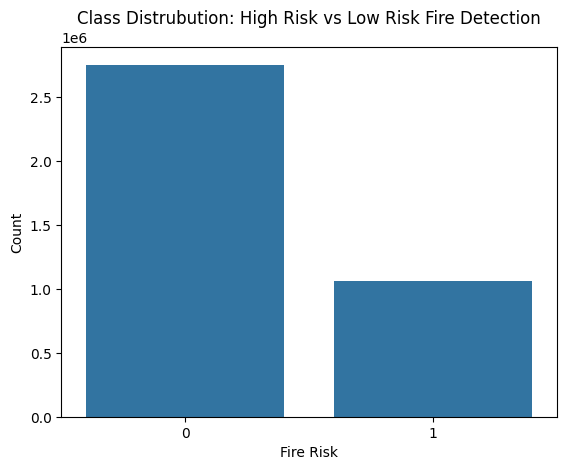

In [ ]:
# Checking Class Balance
sns.countplot(x='fire_risk', data=df)
plt.title("Class Distrubution: High Risk vs Low Risk Fire Detection")
plt.xlabel("Fire Risk")
plt.ylabel("Count")
plt.show()

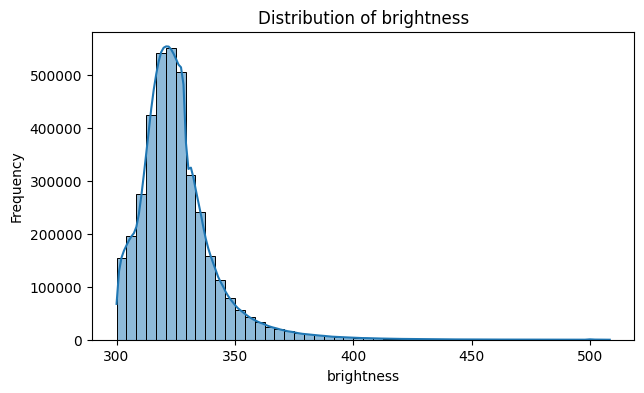

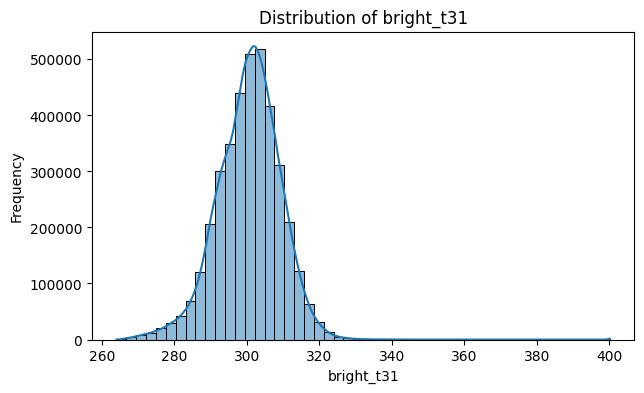

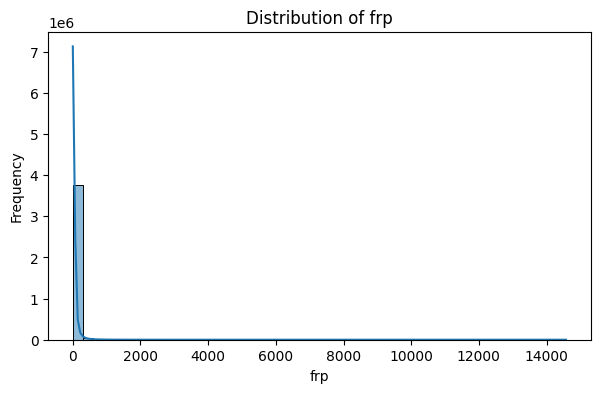

In [ ]:
# Distribution plots for brightness and frp which helps us understand how fire severity is refelcted in data
features = ['brightness', 'bright_t31', 'frp']

for col in features:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

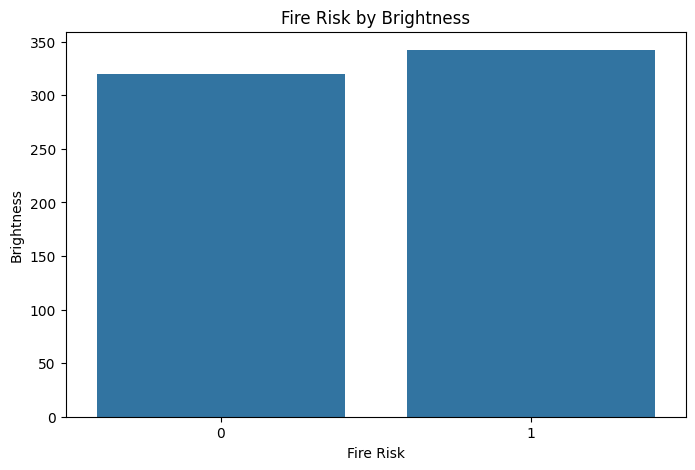

In [ ]:
# Fire Risk by brightness
plt.figure(figsize=(8,5))
sns.barplot(x='fire_risk', y='brightness', data=df)
plt.title("Fire Risk by Brightness")
plt.xlabel("Fire Risk")
plt.ylabel("Brightness")
plt.show()

This shows whether brightness differes significantly between low and high risk fires- useful for model justification

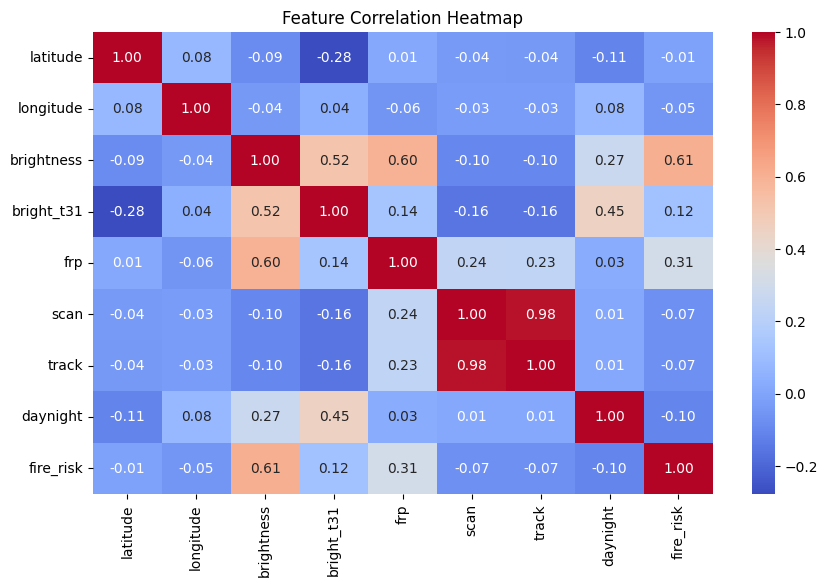

In [ ]:
# Correlation HeatMap
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# World Map of Fires

# Creating map centered at (0,0)
map_center = [0, 0]
m = folium.Map(location=map_center, zoom_start=2)

# Sample data to avoid lag
sample_data = df[['latitude', 'longitude']].dropna().sample(5000).values.tolist()

# Add heatmap layer
HeatMap(sample_data).add_to(m)

display(m)

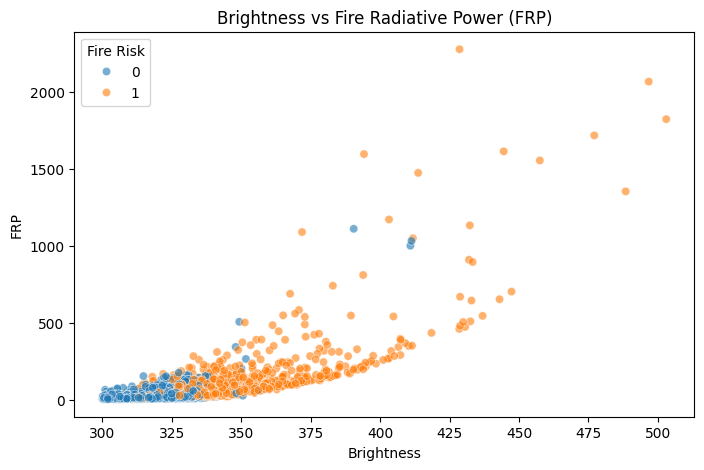

In [ ]:
# Feature Interaction: Brightness vs FRP Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='brightness', y='frp', hue='fire_risk', data=df.sample(5000), alpha=0.6)
plt.title("Brightness vs Fire Radiative Power (FRP)")
plt.xlabel("Brightness")
plt.ylabel("FRP")
plt.legend(title="Fire Risk")
plt.show()

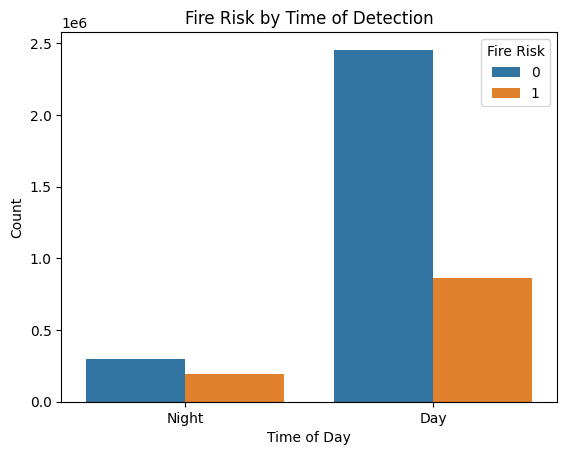

In [ ]:
# Fire Activity by Time of Day
sns.countplot(x='daynight', hue='fire_risk', data=df)
plt.xticks([0,1], ['Night', 'Day'])
plt.title("Fire Risk by Time of Detection")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.legend(title='Fire Risk')
plt.show()

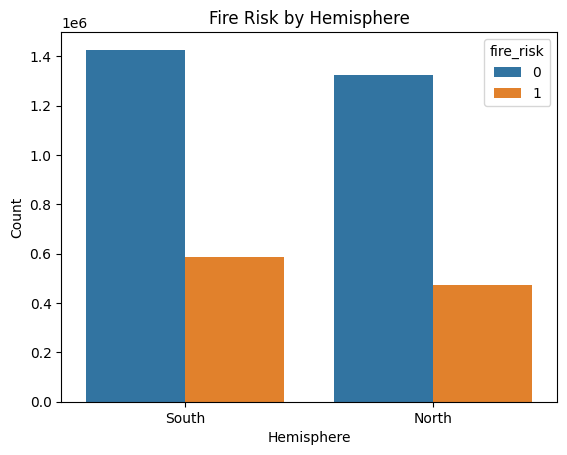

In [ ]:
# Geospatial Heatmap by Hemisphere
# Check weather more fires occur in: Northern Vs Southern and Eastern Vs Western

df['hemisphere'] = df['latitude'].apply(lambda x: 'North' if x >= 0 else 'South')
sns.countplot(x='hemisphere', hue='fire_risk', data=df)
plt.title("Fire Risk by Hemisphere")
plt.xlabel("Hemisphere")
plt.ylabel("Count")
plt.show()

In [ ]:
# Top 1% Most Intense Fire (Outlier Analysis)
top_fires = df[df['frp'] > df['frp'].quantile(0.99)]
print("Top 1% most intense fires:", len(top_fires))

Top 1% most intense fires: 38082


### **Neural Network**

In [ ]:
# Standardization because Neural networks are sensitive to feature scales
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Buidling Neural Network using Keras Sequential API
model= Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




*   Creates a feedforward neural network
    - Input layer- 64 neurons
    - Hidden layer- 32 neurons
    - Output layer- 1 neuron with sigmoid function

*   Sigmoid gives output betwwen 0 and 1 used for binary classification



In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



*   Sets the loss function: `binary_crossentropy` (for 0/1 labels)
*   `adam`: adaptive optimizer that adjusts learning rate for faster convergence

- This step makes model ready for efficient GPU-backed training



In [ ]:
# Training the model using GPU
history = model.fit(X_train, y_train, epochs=10, batch_size=1024, validation_split=0.2)

Epoch 1/10
2381/2381 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9059 - loss: 0.2135 - val_accuracy: 0.9388 - val_loss: 0.1441
Epoch 2/10
2381/2381 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9398 - loss: 0.1418 - val_accuracy: 0.9407 - val_loss: 0.1401
Epoch 3/10
2381/2381 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9414 - loss: 0.1383 - val_accuracy: 0.9418 - val_loss: 0.1377
Epoch 4/10
2381/2381 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9420 - loss: 0.1367 - val_accuracy: 0.9419 - val_loss: 0.1371
Epoch 5/10
2381/2381 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9426 - loss: 0.1359 - val_accuracy: 0.9424 - val_loss: 0.1361
Epoch 6/10
2381/2381 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9430 - loss: 0.1345 - val_accuracy: 0.9428 - val_loss: 0.1352
Epoch 7/10
2381/2381 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9429 - loss: 0.1348 - val_accuracy: 0.9430 - val_loss: 0.1347
Epoch 8/10
2381/2381 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9427 - loss: 0.1



*   Trains the model for 10 full passes (epochs) through the dataset
*   Batch size= 1024: each GPU iteration processes 1024 records in parallel.
- 20% of training data is used to monitor validation performance



In [ ]:
# Evaluate the Model
loss, accuracy= model.evaluate(X_test, y_test)
print(f"Test Accuracy:{accuracy:.4f}")

23807/23807 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9428 - loss: 0.1350
Test Accuracy:0.9427


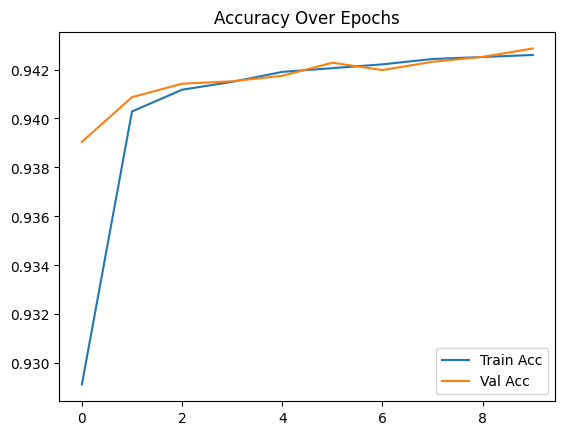

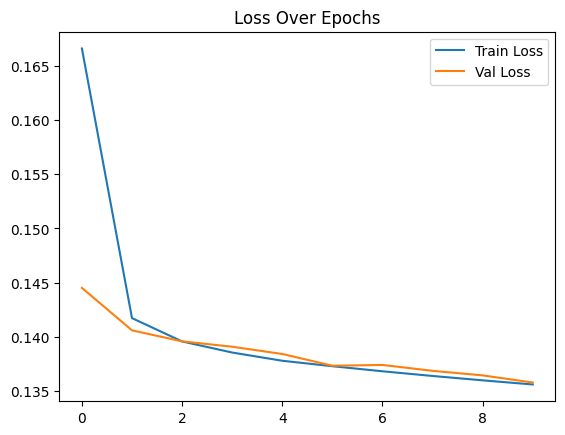

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

In [ ]:
model.save('wildfire_nn_model.h5')

In [ ]:
from google.colab import files
files.download('wildfire_nn_model.h5')

### **Comparison**

With GPU keeping batch_size=256

In [ ]:
# Build model again
model_gpu = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_gpu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train on GPU
start = time.time()
history_gpu = model_gpu.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.1, verbose=1)
end = time.time()

gpu_time = end - start
print(f"GPU Training Time: {gpu_time:.2f} seconds")

# Evaluate
loss_gpu, acc_gpu = model_gpu.evaluate(X_test, y_test)
print(f"GPU Accuracy: {acc_gpu:.4f}, Loss: {loss_gpu:.4f}")

Epoch 1/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9298 - loss: 0.1667 - val_accuracy: 0.9407 - val_loss: 0.1406
Epoch 2/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9407 - loss: 0.1399 - val_accuracy: 0.9419 - val_loss: 0.1387
Epoch 3/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9413 - loss: 0.1386 - val_accuracy: 0.9410 - val_loss: 0.1396
Epoch 4/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9420 - loss: 0.1371 - val_accuracy: 0.9412 - val_loss: 0.1390
Epoch 5/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9425 - loss: 0.1358 - val_accuracy: 0.9422 - val_loss: 0.1386
Epoch 6/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9424 - loss: 0.1359 - val_accuracy: 0.9425 - val_loss: 0.1363
Epoch 7/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9429 - loss: 0.1347 - val_accuracy: 0.9430 - val_loss: 0.1353
Epoch 8/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 

With GPU keeping batch_size= 512

In [ ]:
# Build model again
model_gpu = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_gpu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train on GPU
start = time.time()
history_gpu = model_gpu.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.1, verbose=1)
end = time.time()

gpu_time = end - start
print(f"GPU Training Time: {gpu_time:.2f} seconds")

# Evaluate
loss_gpu, acc_gpu = model_gpu.evaluate(X_test, y_test)
print(f"GPU Accuracy: {acc_gpu:.4f}, Loss: {loss_gpu:.4f}")

Epoch 1/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9231 - loss: 0.1841 - val_accuracy: 0.9397 - val_loss: 0.1425
Epoch 2/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9407 - loss: 0.1402 - val_accuracy: 0.9416 - val_loss: 0.1385
Epoch 3/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9416 - loss: 0.1378 - val_accuracy: 0.9417 - val_loss: 0.1384
Epoch 4/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9421 - loss: 0.1368 - val_accuracy: 0.9418 - val_loss: 0.1381
Epoch 5/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9426 - loss: 0.1355 - val_accuracy: 0.9426 - val_loss: 0.1363
Epoch 6/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9425 - loss: 0.1355 - val_accuracy: 0.9427 - val_loss: 0.1352
Epoch 7/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9428 - loss: 0.1349 - val_accuracy: 0.9428 - val_loss: 0.1352
Epoch 8/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9432 - loss: 0

With CPU batch_size=256

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time

# Build model
model_cpu = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cpu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train on CPU
start = time.time()
history_cpu = model_cpu.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.1, verbose=1)
end = time.time()

cpu_time = end - start
print(f"CPU Training Time: {cpu_time:.2f} seconds")

# Evaluate
loss_cpu, acc_cpu = model_cpu.evaluate(X_test, y_test)
print(f"CPU Accuracy: {acc_cpu:.4f}, Loss: {loss_cpu:.4f}")

Epoch 1/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9291 - loss: 0.1683 - val_accuracy: 0.9394 - val_loss: 0.1429
Epoch 2/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9412 - loss: 0.1387 - val_accuracy: 0.9404 - val_loss: 0.1400
Epoch 3/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9418 - loss: 0.1375 - val_accuracy: 0.9419 - val_loss: 0.1377
Epoch 4/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9422 - loss: 0.1361 - val_accuracy: 0.9415 - val_loss: 0.1380
Epoch 5/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9429 - loss: 0.1349 - val_accuracy: 0.9423 - val_loss: 0.1361
Epoch 6/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9428 - loss: 0.1349 - val_accuracy: 0.9431 - val_loss: 0.1348
Epoch 7/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9430 - loss: 0.1338 - val_accuracy: 0.9431 - val_loss: 0.1351
Epoch 8/10
10714/10714 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 

With CPU keeping batch_size= 512

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time

# Build model
model_cpu = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cpu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train on CPU
start = time.time()
history_cpu = model_cpu.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.1, verbose=1)
end = time.time()

cpu_time = end - start
print(f"CPU Training Time: {cpu_time:.2f} seconds")

# Evaluate
loss_cpu, acc_cpu = model_cpu.evaluate(X_test, y_test)
print(f"CPU Accuracy: {acc_cpu:.4f}, Loss: {loss_cpu:.4f}")

Epoch 1/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9234 - loss: 0.1830 - val_accuracy: 0.9401 - val_loss: 0.1426
Epoch 2/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9406 - loss: 0.1404 - val_accuracy: 0.9409 - val_loss: 0.1395
Epoch 3/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9413 - loss: 0.1383 - val_accuracy: 0.9408 - val_loss: 0.1393
Epoch 4/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9419 - loss: 0.1373 - val_accuracy: 0.9418 - val_loss: 0.1374
Epoch 5/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9421 - loss: 0.1365 - val_accuracy: 0.9424 - val_loss: 0.1365
Epoch 6/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9424 - loss: 0.1357 - val_accuracy: 0.9426 - val_loss: 0.1359
Epoch 7/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9426 - loss: 0.1353 - val_accuracy: 0.9423 - val_loss: 0.1360
Epoch 8/10
5357/5357 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9429 - loss: 0

Latency

In [ ]:
import time
# Time a single prediction for CPU
start = time.time()
_ = model_cpu.predict(X_test[:1])
end = time.time()
print(f"CPU Inference Time: {(end - start)*1000:.2f} ms")

# Time a single prediction for GPU
start = time.time()
_ = model_gpu.predict(X_test[:1])
end = time.time()
print(f"GPU Inference Time: {(end - start)*1000:.2f} ms")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
CPU Inference Time: 198.57 ms
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
GPU Inference Time: 323.50 ms


### **Confusion Matrix and Classification report**

For GPU model

23807/23807 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step


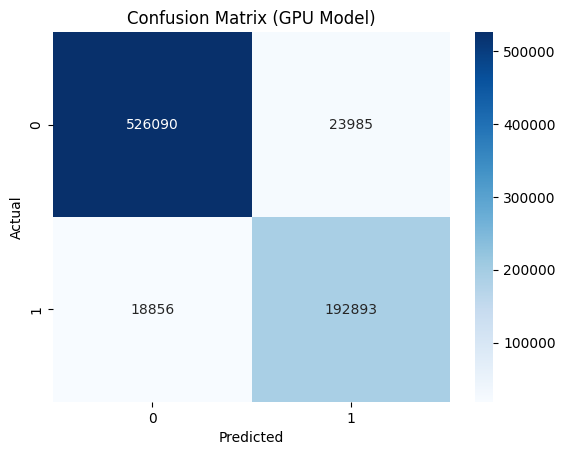

              precision    recall  f1-score   support

           0       0.97      0.96      0.96    550075
           1       0.89      0.91      0.90    211749

    accuracy                           0.94    761824
   macro avg       0.93      0.93      0.93    761824
weighted avg       0.94      0.94      0.94    761824



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred_probs = model_gpu.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (GPU Model)")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

For CPU model

23807/23807 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step


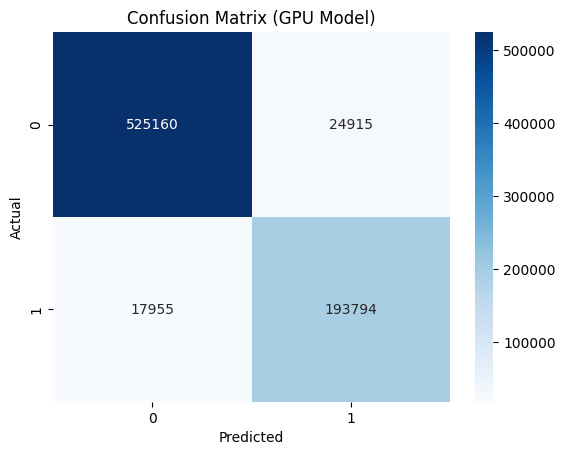

              precision    recall  f1-score   support

           0       0.97      0.95      0.96    550075
           1       0.89      0.92      0.90    211749

    accuracy                           0.94    761824
   macro avg       0.93      0.93      0.93    761824
weighted avg       0.94      0.94      0.94    761824



In [ ]:
# Predict on test set
y_pred_probs = model_cpu.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (GPU Model)")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

### **Plotting Train vs Val Loss/Accuracy**

For GPU

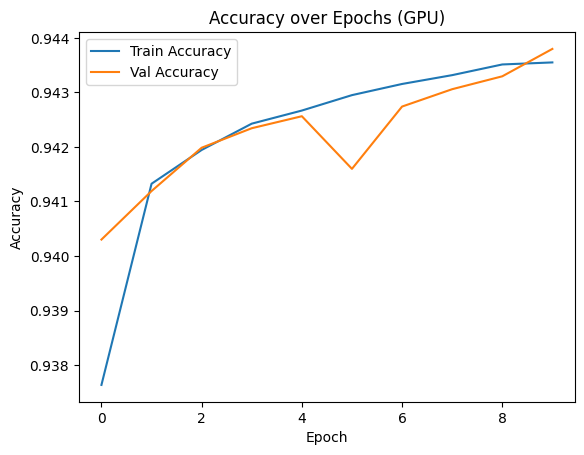

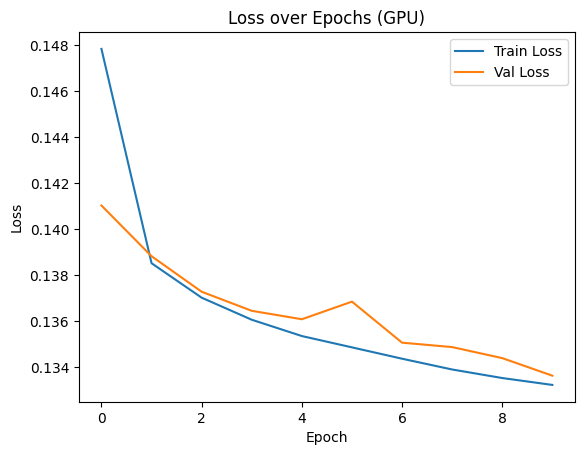

In [ ]:
# Plot training vs validation accuracy
plt.plot(history_gpu.history['accuracy'], label='Train Accuracy')
plt.plot(history_gpu.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs (GPU)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training vs validation loss
plt.plot(history_gpu.history['loss'], label='Train Loss')
plt.plot(history_gpu.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs (GPU)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

For CPU

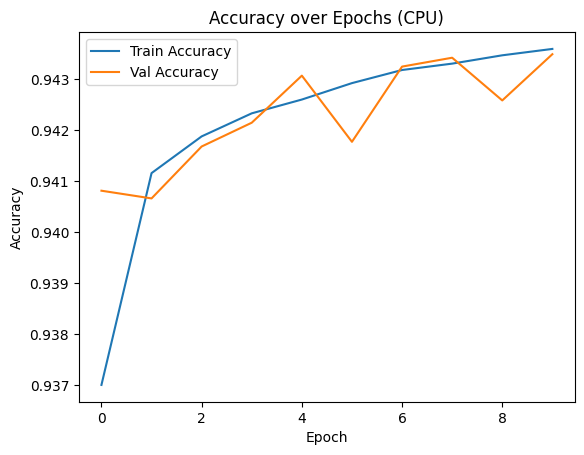

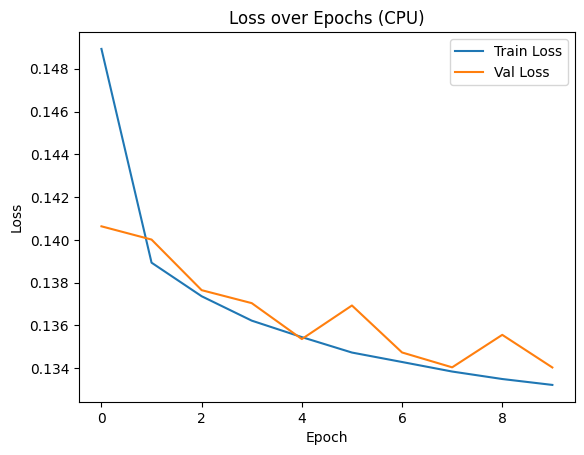

In [ ]:
# Plot training vs validation accuracy
plt.plot(history_cpu.history['accuracy'], label='Train Accuracy')
plt.plot(history_cpu.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs (CPU)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training vs validation loss
plt.plot(history_cpu.history['loss'], label='Train Loss')
plt.plot(history_cpu.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs (CPU)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model_gpu.save("gpu_model.h5")
model_cpu.save("cpu_model.h5")

In [ ]:
df.to_csv("clean_fire_data.csv", index=False)

In [ ]:
from google.colab import files

files.download("gpu_model.h5")
files.download("cpu_model.h5")
files.download("clean_fire_data.csv")
files.download("history_gpu.pkl")
files.download("history_cpu.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: Cannot find file: history_gpu.pkl